# **Exemplo de implementação Árvore de Decisão**


In [1]:
#numpy and pandas initialization
import numpy as np
import pandas as pd

In [3]:
#Loading the PlayTennis data
from google.colab import files  
uploaded = files.upload()
PlayTennis = pd.read_csv("PlayTennis.csv")

Saving PlayTennis.csv to PlayTennis.csv


In [4]:
PlayTennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


Convertendo os valores categóricos (object) em dados numéricos com LabelEncoder:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [5]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [6]:
PlayTennis

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


Divisão da base de dados em treino e teste
* y - Obtem os valores da classe.
* X - Obtem os dados de treinamento (previsores).

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [8]:
y = PlayTennis['play']
X = PlayTennis.drop(['play'],axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [10]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train, y_train)

In [11]:
# The predictions are stored in X_pred
y_pred = clf.predict(X_test)

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.8

In [13]:
y_proba = clf.predict_proba(X_test)

In [14]:
y_proba

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

[Text(0.3333333333333333, 0.9, 'x[0] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'x[1] <= 1.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

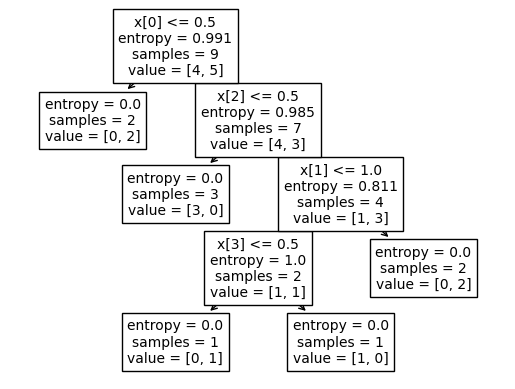

In [15]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

In [16]:
print(clf.feature_importances_)

[0.22681156 0.13959154 0.40937372 0.22422318]


In [17]:
print(clf.feature_names_in_)

['outlook' 'temp' 'humidity' 'windy']


[GraphViz](https://www.graphviz.org/) gives a better and clearer Graph.

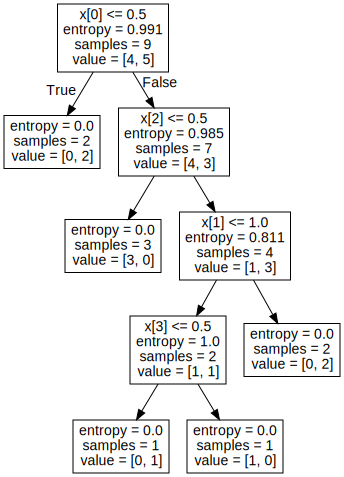

In [18]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In the above graph,

* X[0] -> Outlook
* X[1] -> Temperature
* X[2] -> Humidity
* X[3] -> Wind



Since we dont have any data to test. we can just make the model to predict our train data.